<a href="https://colab.research.google.com/github/LamiaAlariqi/shi_task/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

## Second:
Write a simple function that gets the dataset directly from the website.

In [ ]:
# import needed libraries
import os
import tarfile
import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [ ]:

# Fetch the housing data
fetch_housing_data()

# Load the housing data into a DataFrame
housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

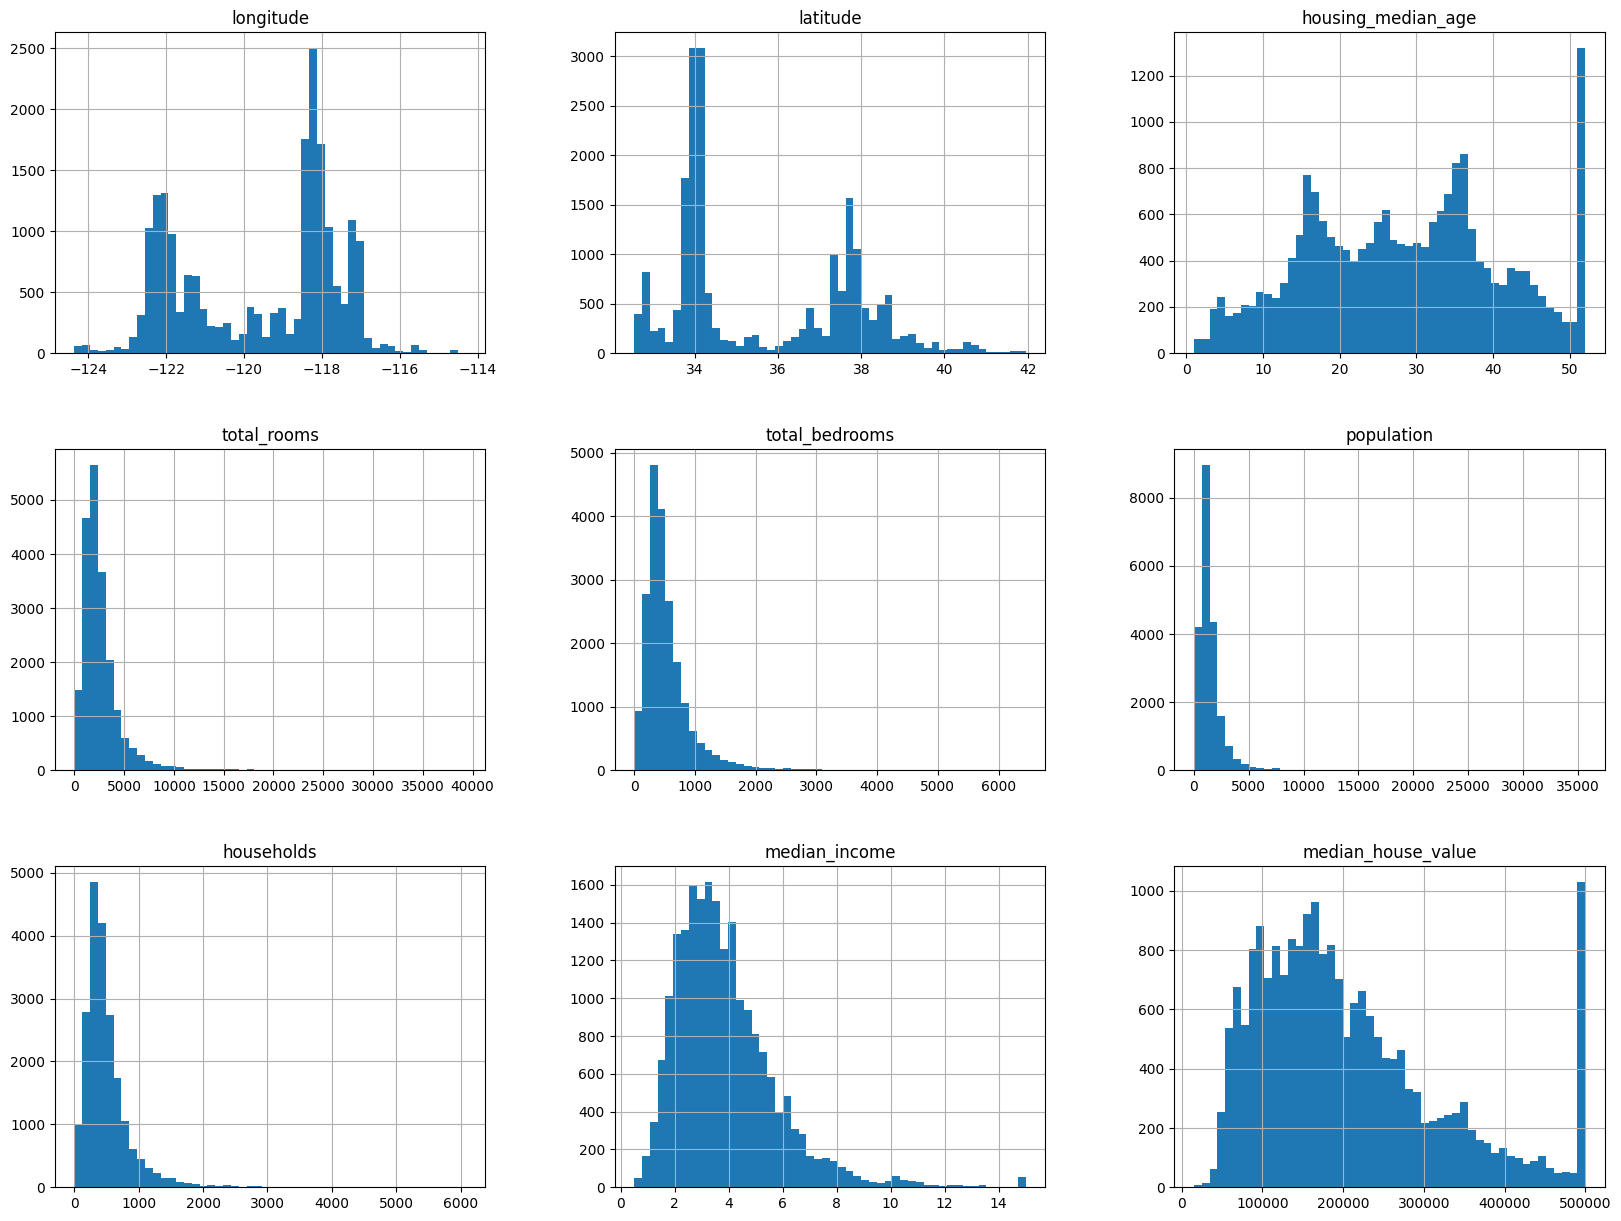

In [ ]:
housing.hist(bins=50, figsize=(20,15));

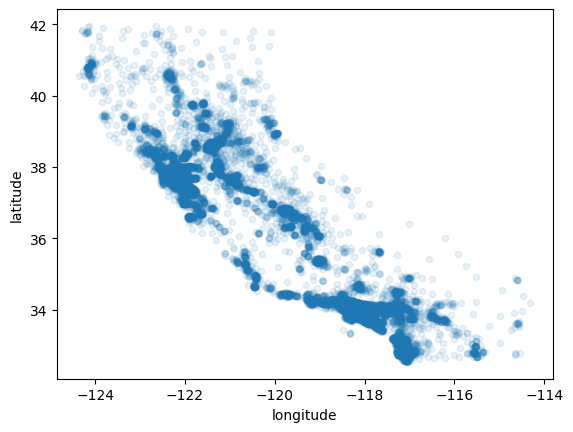

In [ ]:
#Create a scatter plot between "longitude" in x axis and "latitude" in y axis with alpha = 0.1
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

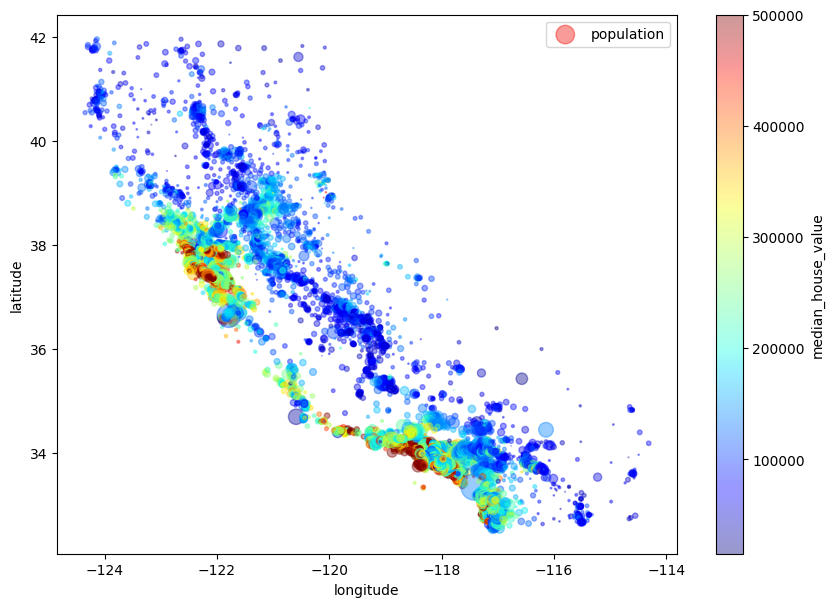

In [ ]:
#Make The radius of each circle represent the district’s population (option s), and the color represents the price (option c).
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False);

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
numeric_col=[col for col in housing.columns if housing[col].dtype in ['int64','float64'] and col!='ocean_proximity']
corr_matrix=housing[numeric_col].corr()
print(corr_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [ ]:
import seaborn as sns

<Axes: >

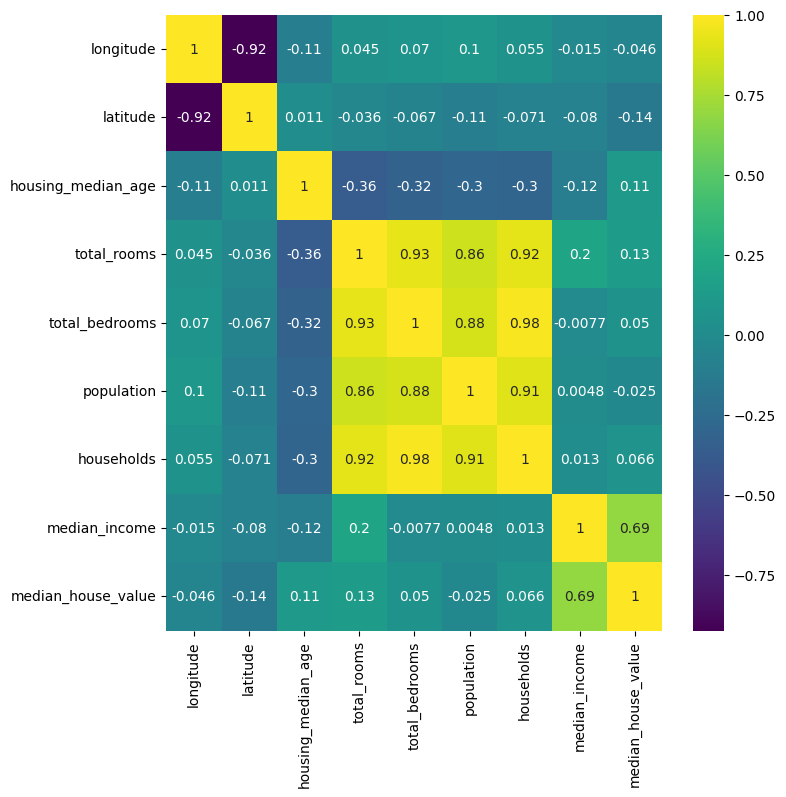

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

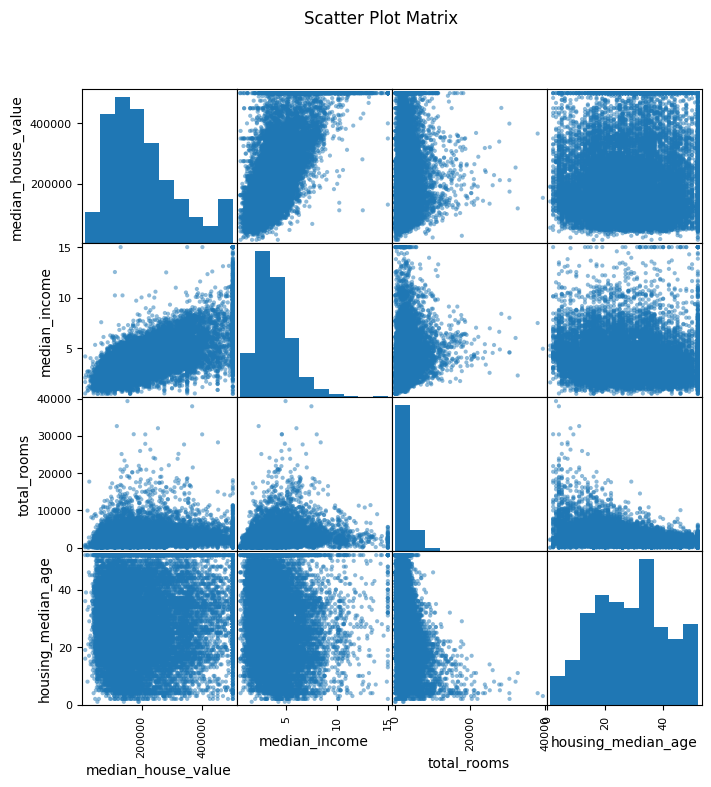

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# CODE HERE
pd.plotting.scatter_matrix(housing[attributes], figsize=(8, 8))
plt.suptitle('Scatter Plot Matrix')
plt.show()

<Figure size 600x600 with 0 Axes>

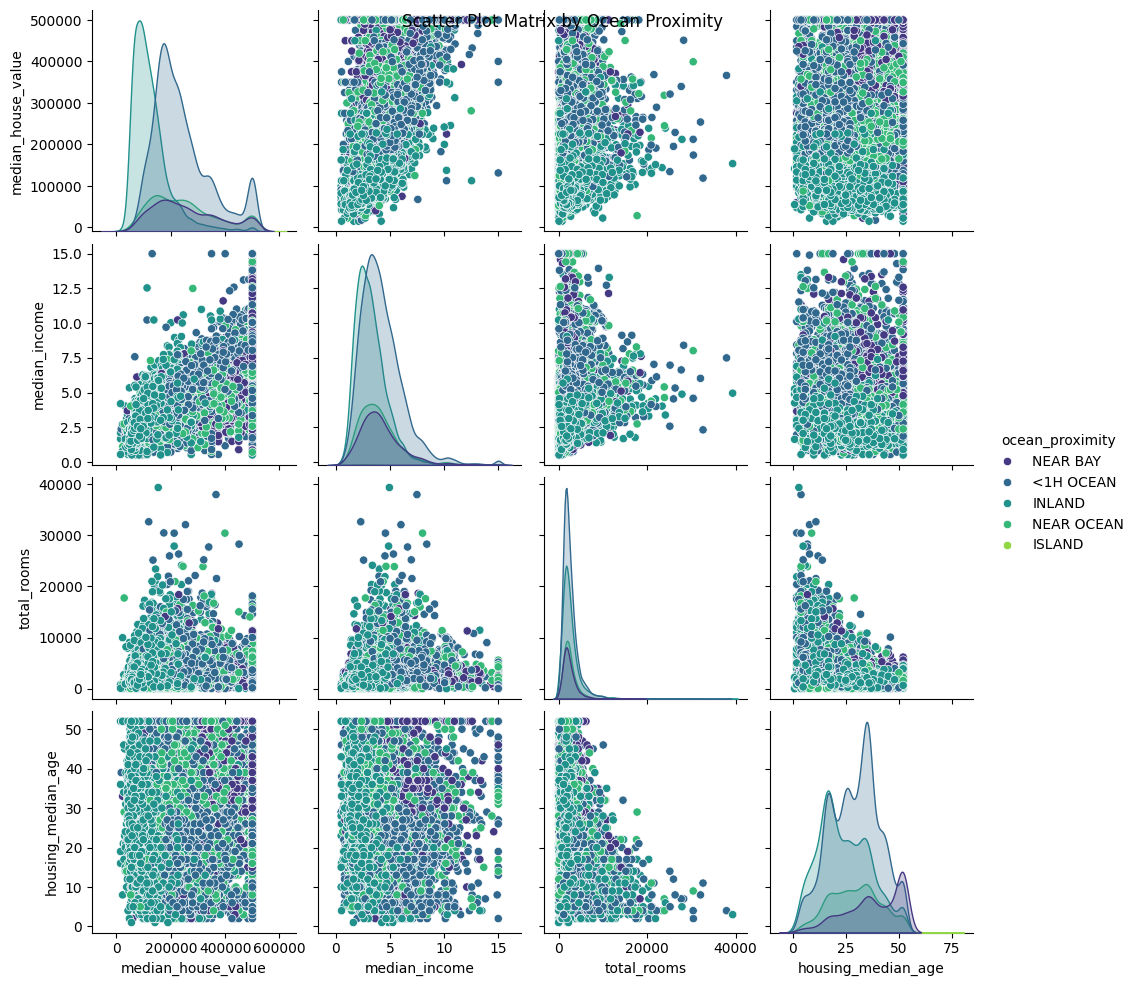

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "ocean_proximity"]
plt.figure(figsize=(6, 6))
sns.pairplot(housing[attributes], hue='ocean_proximity', palette='viridis')
plt.suptitle('Scatter Plot Matrix by Ocean Proximity')
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

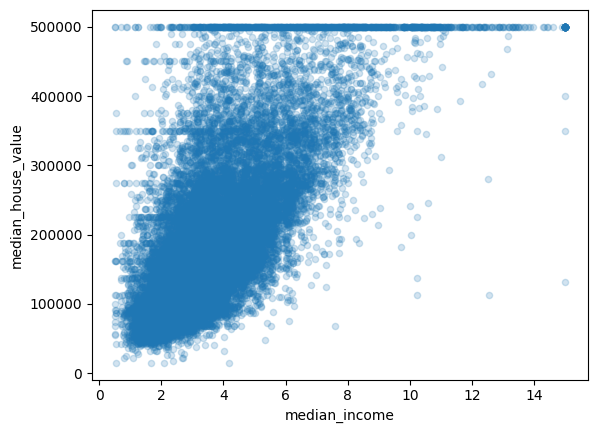

In [ ]:
housing.plot(kind='scatter', x='median_income',y='median_house_value',alpha=0.2)

<ipython-input-19-2f3abf4181ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='median_house_value', y='ocean_proximity', data=housing, palette=['darkblue', 'orange', 'green', 'red', 'violet'])


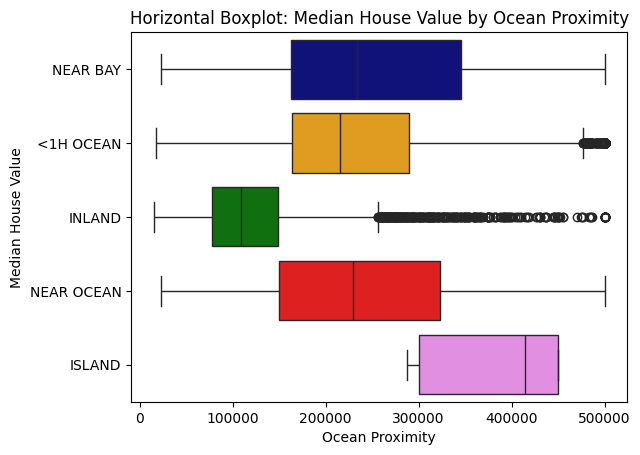

In [ ]:
sns.boxplot(x='median_house_value', y='ocean_proximity', data=housing, palette=['darkblue', 'orange', 'green', 'red', 'violet'])
plt.title('Horizontal Boxplot: Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [ ]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)

In [ ]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
print((housing == 0).sum(axis=0))

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

In [ ]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

In [ ]:
housing['population_per_household'] = housing['population'] / housing['households']

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [ ]:
numeric_col=[col for col in housing.columns if housing[col].dtype in ['int64','float64'] and col!='ocean_proximity']
corr2_matrix=housing[numeric_col].corr()
print(corr2_matrix["median_house_value"])


longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049457
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_room          -0.233303
population_per_household   -0.023737
Name: median_house_value, dtype: float64


In [ ]:
housing2 = housing.copy(deep=True)

In [ ]:

old_features = ['total_bedrooms', 'total_rooms', 'population', 'households']
housing.drop(old_features, axis=1, inplace=True)

In [ ]:
print(housing["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
housing_cat = housing[["ocean_proximity"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder object
encoder = OneHotEncoder()

# Fit and transform the housing_cat column
housing_cat_encoded = encoder.fit_transform(housing_cat).toarray()

print(housing_cat_encoded)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
housing_num = housing.drop("ocean_proximity", axis=1)

# CODE HERE

In [ ]:
scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num)

print(housing_num_scaled)

[[-1.32783522  1.05254828  0.98214266 ...  0.62855945 -1.02998783
  -0.04959654]
 [-1.32284391  1.04318455 -0.60701891 ...  0.32704136 -0.8888972
  -0.09251223]
 [-1.33282653  1.03850269  1.85618152 ...  1.15562047 -1.29168566
  -0.02584253]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.09031802  0.02113407
  -0.0717345 ]
 [-0.87362627  1.77823747 -0.84539315 ... -0.04021111  0.09346655
  -0.09122515]
 [-0.83369581  1.75014627 -1.00430931 ... -0.07044252  0.11327519
  -0.04368215]]


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [ ]:
housing2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

Custom Transformers


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing2.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)

# Transform the housing values
housing_extra_attribs = attr_adder.transform(housing2.values)

In [ ]:
print(housing_extra_attribs)

[[-122.23 37.88 41.0 ... 6.984126984126984 2.5555555555555554
  0.14659090909090908]
 [-122.22 37.86 21.0 ... 6.238137082601054 2.109841827768014
  0.15579659106916466]
 [-122.24 37.85 52.0 ... 8.288135593220339 2.8022598870056497
  0.12951601908657123]
 ...
 [-121.22 39.43 17.0 ... 5.20554272517321 2.325635103926097
  0.21517302573203195]
 [-121.32 39.43 18.0 ... 5.329512893982808 2.1232091690544412
  0.21989247311827956]
 [-121.24 39.37 16.0 ... 5.254716981132075 2.616981132075472
  0.22118491921005387]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
#Create your own pipline for numerical attributes. It should contain SimpleImputer, CombinedAttributesAdder, and StandardScaler. call it num_pipeline.
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', attr_adder),
    ('std_scaler', StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

now create a full pipeline called full_pipeline , use num_pipeline for numerical attributes and OneHotEncoder for catigorcal attributes .

In [ ]:
cat_pipeline = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(), cat_attribs)
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attribs),
    ('cat_pipeline', cat_pipeline, cat_attribs)
])

In [ ]:
housing2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing2)

In [ ]:
print(housing_prepared[:5])

[[-1.32783522  1.05254828  0.98214266  2.34476576  2.12963148  0.62855945
  -1.02998783 -0.04959654  2.27149077  1.15190671 -0.06614508  0.
   0.          0.          1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.33223796  1.31415614  0.32704136
  -0.8888972  -0.09251223  2.04860642  0.69669858 -0.41167211  0.
   0.          0.          1.          0.        ]
 [-1.33282653  1.03850269  1.85618152  1.7826994   1.25869341  1.15562047
  -1.29168566 -0.02584253  2.2233819   2.13073504 -0.24692204  0.
   0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152  0.93296751  1.16510007  0.15696608
  -0.4496128  -0.0503293   0.60712343  0.18764389  0.12287843  0.
   0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.012881    1.17289952  0.3447108
  -0.63908657 -0.08561576  0.08342766  0.48486899  1.00341848  0.
   0.          0.          1.          0.        ]]


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the predictors and the labels
X = housing2.iloc[:, :-1]
y = housing2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

report :
1. Data Acquisition:
The housing price in California dataset was obtained for analysis and model
development. The dataset contains various features such as the number of rooms,
median income, housing prices, and other relevant variables.
2. Data Exploration and Visualization:
a) Top Five Rows: The head() method was used to examine the first five rows of the
dataset, providing an initial understanding of the data structure and variables.
b) Data Description: The info() method was employed to obtain a quick description of
the data, including the number of instances, attribute types, and any missing values.
c) Analysis of "ocean_proximity": The value_counts() method was used to determine the
number of districts belonging to each category in the "ocean_proximity" variable.
d) Summary of Numerical Attributes: The describe() method was utilized to generate a
statistical summary of the numerical attributes, including count, mean, standard
deviation, minimum, quartiles, and maximum values.
e) Data Visualization: Various visualizations were created to gain insights into the
dataset, including:
 Histogram Plot: A histogram plot was generated to visualize the distribution of
the housing dataframe.
 Scatter Plot: A scatter plot was created between the "longitude" and "latitude"
variables, with the alpha parameter set to 0.1. The size of each circle represented
the district's population, and the color represented the price.
 Correlation Analysis: The correlation matrix was computed using the .corr()
method to explore the relationships between all continuous numeric variables. A
heatmap plot was generated using the seaborn library to visualize the
correlations.
 Scatter Matrix: The pandas scatter_matrix() function was used to examine the
correlations between attributes. The plot was color-coded based on the
"ocean_proximity" category using the seaborn pairplot.
 Scatter Plot: A scatter plot was created between the "median_income" and
"median_house_value" variables to explore their relationship.
 Box Plot: A box plot was generated to show the relationship between the
"median_house_value" and the categorical feature "ocean_proximity".
3. Data Preprocessing:
a) Data Cleaning: The dataset was examined for missing values, and it was found that
the "total_bedrooms" attribute had some missing values. The missing values were filled
with the median value using the fillna() method.
b) Handling Zeros: It was verified that there were no zeros in the dataset, which could
indicate missing values.
c) Attribute Combinations: New attributes were created by combining existing ones,
namely "rooms_per_household" (derived from "total_rooms" and "households"),
"bedrooms_per_room" (derived from "total_bedrooms" and "total_rooms"), and
"population_per_household" (derived from "population" and "households").
d) Handling Text and Categorical Attributes: The categorical feature "ocean_proximity"
was handled by creating a separate variable called "housing_cat" and using the
OneHotEncoder from sklearn to encode the categorical values.
e) Feature Scaling: Numerical values were scaled using the StandardScaler from sklearn.
The numerical attributes were stored in a variable called "housing_num".
f) Custom Transformers: A custom transformer class called "CombinedAttributesAdder"
was created to add the combined attributes discussed earlier. The transformer was
instantiated as "attr_reader", and the housing values were transformed and saved in a
variable called "housing_extra_attribs".
g) Pipeline Creation: Two pipelines were created - "num_pipeline" for numerical
attributes and "full_pipeline" for both numerical and categorical attributes. The
"num_pipeline" included the SimpleImputer, CombinedAttributesAdder, and
StandardScaler transformers.
4. Train-Test Split:
The data was split into training and testing sets using the train_test_split function from
sklearn.model_selection. The random_state parameter was set to 42 to ensure
reproducibility. The predictors and labels were separated into "housing" and
"housing_labels" variables, respectively.
The machine learning life cycle involves several additional steps beyond the scope of
this report, such as model selection, training, evaluation, optimization, deployment, and
maintenance. These steps would typically be followed to develop and deploy a machine
learning model based on the given dataset